In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('As3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.equalizeHist(img)

# Get image shape
h, w = img.shape[0:2]

# Split the image into 2 images
imgL = img[0:int(h),0:int(w/2)+1]
imgR = img[0:int(h),int(w/2):int(w)]

# Show both images for 15 Seconds
cv2.imshow('Image 1',imgL)
cv2.imshow('Image 2',imgR)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [ ]:
# Create empty output image
outputImage = np.zeros((h, w, 1), np.uint8)

# Loop over every pixel with the height of the original image, but half of the width since the original image was split
for y in range(0, (h-1)):
    for x in range(0, int((w-1)/2)):
        # Define an array for the ssd values of each pixel
        ssd = []
        # Check for the corresponding 75 translated pixels in each pixel in the reference image 
        for q in range(-75, 0):
            # If the translated pixel is not outside of the boundaries of the 2nd image
            if(x+q >= 0):
                # Define a total for each 
                total = 0
                for i in range(-3, 4):
                    for j in range(-3, 4):
                        # Check if pixel does not lie outisde the boundaries of the image (Handling corner pixels)
                        if (not( ( (y-i < 0) | (x - j < 0) ) | ( (y-i >= h) | (x - j >= int(w/2) ) ))):
                            # Add square of difference for the corresponding pixels to the total sum
                            total = total + ( (imgL[y-i, x-j] - imgR[y-i, x-j]) * (imgL[y-i, x-j] - imgR[y-i, x-j]) )
                # Append the sum of squares value to the ssd array
                ssd.append(total)
                # Get the best ssd/smallest value
                bestVal = min(ssd)
                # Set the output image pixel to the best ssd value
                outputImage[y, x] = bestVal

In [ ]:
# Normalise output matrix image
outputImage2 = cv2.normalize(outputImage, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
cv2.imshow('Output Image Normalised',outputImage2)
cv2.waitKey(10000)
cv2.destroyAllWindows()

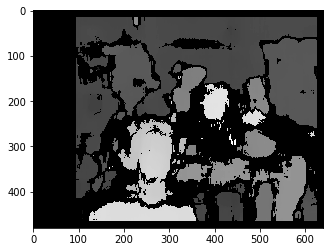

In [41]:
# Bonus: Disparity Map
stereo = cv2.StereoBM_create(numDisparities=80, blockSize=31)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()